In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
#Importing Data
Data= pd.read_csv("http://bit.ly/w-data")

In [5]:
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
Data.shape

(25, 2)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


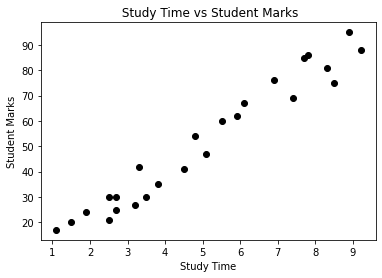

In [12]:
plt.scatter(x=Data.Hours, y=Data.Scores, color='Black')
plt.title(" Study Time vs Student Marks")
plt.xlabel("Study Time")
plt.ylabel("Student Marks")
plt.show()

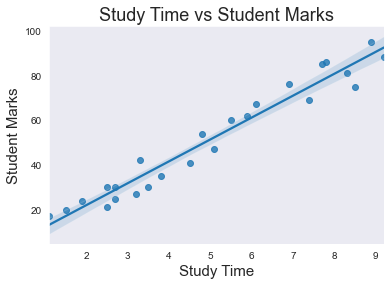

In [18]:
sns.set_style('dark')
sns.regplot(y=Data['Scores'],x=Data['Hours'])
plt.title("Study Time vs Student Marks", size= 18)
plt.xlabel("Study Time",size=15)
plt.ylabel("Student Marks",size=15)
plt.show()

In [19]:
x=Data.iloc[:,:-1].values 
# Let x be no. of study hours

y=Data.iloc[:,1].values   
# Let y be Marks obtained

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25)

#splitting the dataset

In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(x_test)
prediction=pd.DataFrame({'Hours':[i[0] for i in x_test], 'Predicted Marks': [k for k in y_test]})
prediction

,Hours,Predicted Marks
0,2.7,30
1,7.4,69
2,7.8,86
3,3.8,35
4,6.9,76
5,2.7,25
6,5.5,60


In [23]:
comparison= pd.DataFrame({'predicted Marks': y_pred, 'Actual Marks':y_test})
comparison

,predicted Marks,Actual Marks
0,29.237958,30
1,73.966498,69
2,77.773182,86
3,39.706340,35
4,69.208143,76
5,29.237958,25
6,55.884748,60


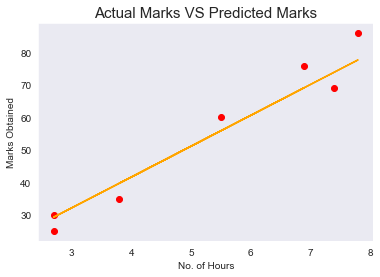

In [25]:
plt.scatter(x=x_test, y=y_test, color='Red')
plt.plot(x_test,y_pred, color='orange')
plt.title('Actual Marks VS Predicted Marks', size =15)
plt.xlabel("No. of Hours")
plt.ylabel("Marks Obtained")
plt.show()

In [26]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

MAE 4.829537891721406


In [27]:
No_Hours=[9.25]
pred=model.predict([No_Hours])
print("Marks Predicted={}".format(round(pred[0],4)))

Marks Predicted=91.5724


In [28]:
# Conclusion : If a student studies for 9.25 Hours/Day ,He/She likely to score 93.377 marks.

In [29]:
# Calculating the accuracy of the model
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.829537891721406
